# Retrieving Bubble Tea Shops in NYC Using Yelp Fusion API

Mark Bauer

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

In [2]:
# API only returns 1,000 results and 50 per request
# we use the offset parameter to page through to the next 50
# source: https://www.yelp.com/developers/faq

# saving my api key as an environment variable
api_key = os.environ.get('yelp_api')

# empyt list to place our data for each page
lst = []

# our offset parameter - each page 50 rows
offset = 0
print('initial offset number: {}'.format(offset))

# loop through the api 20 times (limit is 1000 rows with each page includes 50 rows)
for i in range(20):
    
    try:
        headers = {'Authorization': 'Bearer {}'.format(api_key)}
        search_api_url = 'https://api.yelp.com/v3/businesses/search'
        params = {
                  'term': 'bubble tea', 
                  'categories': 'bubbletea, boba',
                  'location': 'New York City',
                  'offset': offset,
                  'limit': 50}

        response = requests.get(search_api_url, 
                                headers=headers, 
                                params=params, 
                                timeout=10)

        # return a dictionary
        data_dict = response.json()
        
        # convert the business dictionary to a pandas dataframe
        data = pd.DataFrame(data_dict['businesses'])
        lst.append(data)
      
        # add 50 to the offset to access a new page
        offset += 50
        print('current offset number: {}'.format(offset))
        
    except Exception as ex:
        print(ex)
        break

# concatenate all pages to one dataframe
df = pd.concat(lst)
df = df.reset_index(drop=True)

rows, columns = df.shape
print()
print('query includes {:,} rows and {} columns.'.format(rows, columns))
print('rows id is unique: {}.'.format(df['id'].is_unique))

if df['id'].is_unique == False:
    duplicates = df.loc[df.duplicated(subset=['id'])]
    vals = list(duplicates.head()['name'].values)
    print('duplicates: {}.'.format(vals))
    
    df = df.drop_duplicates(subset=['id']).reset_index(drop=False)
    print('dropping duplicates...')
    
    rows, columns = df.shape
    print('rows id is unique: {}.'.format(df['id'].is_unique))
    print('query includes {:,} rows and {} columns.'.format(rows, columns))

initial offset number: 0
current offset number: 50
current offset number: 100
current offset number: 150
current offset number: 200
current offset number: 250
current offset number: 300
current offset number: 350
current offset number: 400
current offset number: 450
current offset number: 500
current offset number: 550
current offset number: 600
current offset number: 650
current offset number: 700
current offset number: 750
current offset number: 800
current offset number: 850
current offset number: 900
current offset number: 950
current offset number: 1000

query includes 533 rows and 16 columns.
rows id is unique: True.


In [3]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370


In [4]:
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
528,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","[delivery, pickup]",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",,,15054.917573
529,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",,,15147.410738
530,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",+12129666206,(212) 966-6206,1414.238245
531,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",,,15045.970192
532,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",+17188869200,(718) 886-9200,14997.842205


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             533 non-null    object 
 1   alias          533 non-null    object 
 2   name           533 non-null    object 
 3   image_url      533 non-null    object 
 4   is_closed      533 non-null    bool   
 5   url            533 non-null    object 
 6   review_count   533 non-null    int64  
 7   categories     533 non-null    object 
 8   rating         533 non-null    float64
 9   coordinates    533 non-null    object 
 10  transactions   533 non-null    object 
 11  price          327 non-null    object 
 12  location       533 non-null    object 
 13  phone          533 non-null    object 
 14  display_phone  533 non-null    object 
 15  distance       533 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 63.1+ KB


In [6]:
df['name'].value_counts()

Gong Cha                  36
Kung Fu Tea               34
Vivi Bubble Tea           22
Möge Tee                  10
CoCo Fresh Tea & Juice     8
                          ..
Momo Ashi                  1
Barley Time                1
Surreal Creamery           1
DIY POKE SUSHI II          1
Meadows Cafe               1
Name: name, Length: 355, dtype: int64

In [7]:
df['name'].value_counts().head(20)

Gong Cha                       36
Kung Fu Tea                    34
Vivi Bubble Tea                22
Möge Tee                       10
CoCo Fresh Tea & Juice          8
Coco Fresh Tea & Juice          6
Tiger Sugar                     5
ViVi Bubble Tea                 5
Real Fruit Bubble Tea           4
Chun Yang Tea                   4
TBaar                           4
Banhmigos                       4
Hawa Smoothies & Bubble Tea     4
Teazzi Tea Shop                 3
Mr. Wish                        3
Yaya Tea Garden                 3
Jupioca                         3
Hanco's                         3
Yifang Taiwan Fruit Tea         3
Mi Tea                          3
Name: name, dtype: int64

In [8]:
df['categories'][0]

[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]

In [9]:
gdf = pd.concat([df, df['coordinates'].apply(pd.Series)], axis=1)

gdf = gpd.GeoDataFrame(gdf, crs=4326, 
      geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)


In [10]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
boro_gdf = gpd.read_file(url)

boro_gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366208e+08,359993.127161,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187194e+09,463868.935588,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934174e+09,728195.194837,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
3,5.0,Staten Island,1.623631e+09,325924.002252,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
4,4.0,Queens,3.040206e+09,900269.281914,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


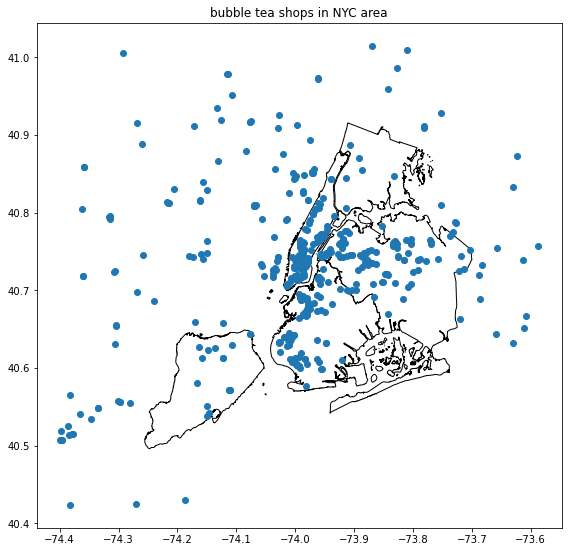

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC area')
plt.tight_layout()

In [12]:
gdf = gpd.clip(gdf, boro_gdf)
gdf = gdf.reset_index(drop=True)

gdf.shape

(397, 19)

In [13]:
gdf.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","[delivery, pickup]",$$,"{'address1': '208 Grand St', 'address2': None,...",+16465592886,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.99622 40.71917)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","[delivery, pickup]",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",,,2656.450427,40.728800,-73.987750,POINT (-73.98775 40.72880)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","[delivery, pickup]",$$,"{'address1': '23 Clinton St', 'address2': None...",,,1877.016204,40.720597,-73.984539,POINT (-73.98454 40.72060)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","[delivery, pickup]",NaN,"{'address1': '32 Union Square E', 'address2': ...",+16467670085,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919 40.73552)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","[delivery, pickup]",$$,"{'address1': '26B Elizabeth St', 'address2': '...",+12124200123,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.99710 40.71617)


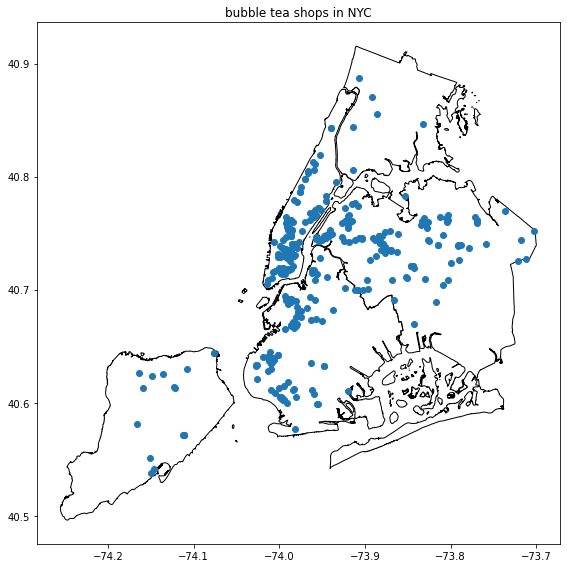

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(ax=ax)
boro_gdf.plot(ax=ax, facecolor='None', edgecolor='black', zorder=0)

plt.title('bubble tea shops in NYC')
plt.tight_layout()

In [15]:
# save file
gdf.to_csv('boba-nyc.csv', index=False)

In [16]:
# sanity check
pd.read_csv('boba-nyc.csv').head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
